In [167]:
import pandas as pd
import scipy as sc
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model
from sklearn.multioutput import MultiOutputRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor



In [169]:
parkinsons_data = pd.read_csv("parkinsons_updrs.data")
print(parkinsons_data.shape)

(5875, 22)


We see specifically that we have 22 different features and 5875 the number of registrations.

In [170]:
parkinsons_data.head()

,subject#,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,1,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,1,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,1,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,1,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


There is a feature called "subject", which shows us each patient . But its layout does not make sense (it is unordered), so it can then confuse the training . So we need to remove it .

In [171]:
parkinsons_data = parkinsons_data.drop(['subject#'], axis=1)
parkinsons_data.head()

,age,sex,test_time,motor_UPDRS,total_UPDRS,Jitter(%),Jitter(Abs),Jitter:RAP,Jitter:PPQ5,Jitter:DDP,...,Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,Shimmer:APQ11,Shimmer:DDA,NHR,HNR,RPDE,DFA,PPE
0,72,0,5.6431,28.199,34.398,0.00662,0.000034,0.00401,0.00317,0.01204,...,0.230,0.01438,0.01309,0.01662,0.04314,0.014290,21.640,0.41888,0.54842,0.16006
1,72,0,12.6660,28.447,34.894,0.00300,0.000017,0.00132,0.00150,0.00395,...,0.179,0.00994,0.01072,0.01689,0.02982,0.011112,27.183,0.43493,0.56477,0.10810
2,72,0,19.6810,28.695,35.389,0.00481,0.000025,0.00205,0.00208,0.00616,...,0.181,0.00734,0.00844,0.01458,0.02202,0.020220,23.047,0.46222,0.54405,0.21014
3,72,0,25.6470,28.905,35.810,0.00528,0.000027,0.00191,0.00264,0.00573,...,0.327,0.01106,0.01265,0.01963,0.03317,0.027837,24.445,0.48730,0.57794,0.33277
4,72,0,33.6420,29.187,36.375,0.00335,0.000020,0.00093,0.00130,0.00278,...,0.176,0.00679,0.00929,0.01819,0.02036,0.011625,26.126,0.47188,0.56122,0.19361


we make sure that there are no missing values in the data.

In [172]:
parkinsons_data.isnull().sum()

age              0
sex              0
test_time        0
motor_UPDRS      0
total_UPDRS      0
Jitter(%)        0
Jitter(Abs)      0
Jitter:RAP       0
Jitter:PPQ5      0
Jitter:DDP       0
Shimmer          0
Shimmer(dB)      0
Shimmer:APQ3     0
Shimmer:APQ5     0
Shimmer:APQ11    0
Shimmer:DDA      0
NHR              0
HNR              0
RPDE             0
DFA              0
PPE              0
dtype: int64

 luckily there are no missing values at all, so we will not worry about this problem.

------------------------------------------------------
We divide the table into input and output elements..
X is : features, and 
Y is : target (motor UPDRS and total UPDRS)


In [174]:
arr = parkinsons_data.values
X1 = arr[:,0:4] 
X2 = arr[:,6:]  
X = np.hstack((X1,X2))  
Y = arr[:,4:6]  

In [175]:
X.shape

(5875, 19)

In [176]:
Y.shape

(5875, 2)

Then we split our data into train and test, as shown below.our train set is 30% of our original data set.

In [177]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (4112, 19) (4112, 2)
Test (1763, 19) (1763, 2)


    Feature Selection
    ---------------------------------------------------------------------------------------
    Filter method
 the correlations between our data  with the heatmap

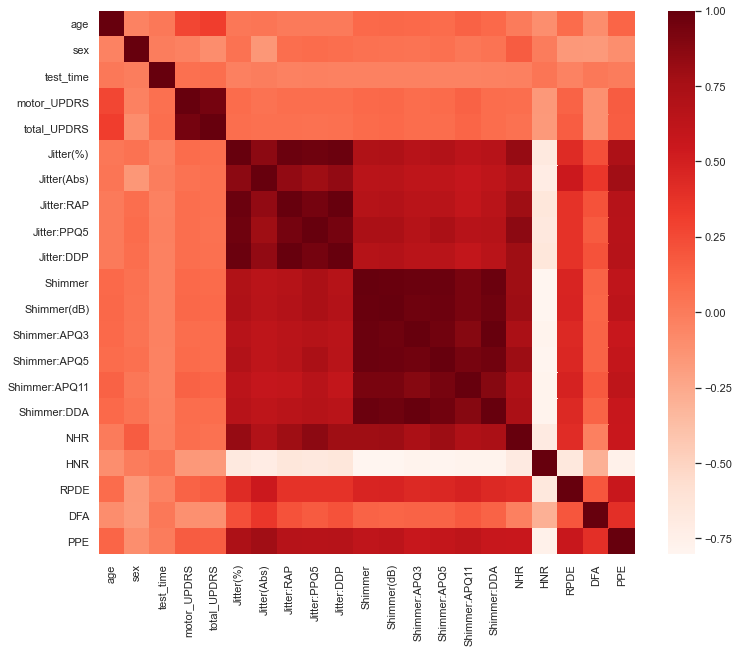

In [178]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = parkinsons_data.corr()
sns.heatmap(cor, annot=False,cmap=plt.cm.Reds)
plt.show()

we can put a threshold and see which of our random variables are more positively correlated with the random variables y we want to predict.

In this case we set 0.1 as threshlold. This is also a way to choose features.

In [179]:
#Correlation with output variable
cor_target = abs(cor['motor_UPDRS'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features #.sort_values( ascending=False)

age              0.273665
motor_UPDRS      1.000000
total_UPDRS      0.947231
Shimmer          0.102349
Shimmer(dB)      0.110076
Shimmer:APQ11    0.136560
HNR              0.157029
RPDE             0.128607
DFA              0.116242
PPE              0.162433
Name: motor_UPDRS, dtype: float64

In [180]:
#Correlation with output variable
cor_target = abs(cor['total_UPDRS'])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.1]
relevant_features #.sort_values( ascending=False)

age              0.310290
motor_UPDRS      0.947231
total_UPDRS      1.000000
Shimmer:APQ11    0.120838
HNR              0.162117
RPDE             0.156897
DFA              0.113475
PPE              0.156195
Name: total_UPDRS, dtype: float64

As we can see,  these are only  features that are highly correlated with the output variables. Hence we will drop all other features apart from these.

    Wrapper Method - Backward Elimination
Here we examine the performance of our algorithm through its metric p-value. If the p-value is greater than 0.05 then we remove the attribute, otherwise we keep it.

In [147]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

#Adding constant column of ones, mandatory for sm.OLS model
X_1 = sm.add_constant(X_train)
#Fitting sm.OLS model
model = sm.OLS(y_train[:,0],X_1).fit()
model.pvalues

array([1.33450984e-02, 9.59188965e-27, 4.45728273e-23, 2.53012005e-02,
       0.00000000e+00, 3.08905155e-04, 7.01526691e-01, 9.11879736e-02,
       6.99734647e-01, 5.96002351e-01, 5.07295894e-02, 5.47363456e-01,
       3.77226687e-07, 2.62546302e-07, 5.47178480e-01, 1.16692440e-01,
       6.47388950e-06, 3.21711429e-04, 5.77914083e-03, 1.11540427e-03])

We can create a loop and repeat this process until we come up with the best possible model.

In [161]:
#Backward Elimination
cols = list(pd.DataFrame(X_train).columns)
pmax = 1
while (len(cols)>0):
    p= []
    X_1 = pd.DataFrame(X_train)[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(pd.DataFrame(y_train[:,0]),X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)      
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
selected_features_BE = cols
print(selected_features_BE)

[0, 1, 2, 3, 4, 6, 9, 11, 12, 15, 16, 17, 18]


    Embedded Method

In [183]:
reg = LassoCV()
reg.fit(X_train, y_train[:,0])
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X_train,y_train[:,0]))
coef = pd.Series(reg.coef_, index = pd.DataFrame(X_train).columns)

Best alpha using built-in LassoCV: 0.081302
Best score using built-in LassoCV: 0.902880


In [184]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 5 variables and eliminated the other 14 variables


Text(0.5, 1.0, 'Feature importance using Lasso Model')

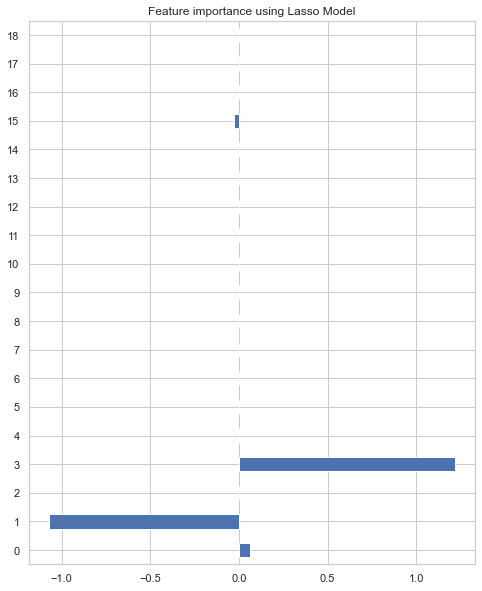

In [185]:
imp_coef =coef
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")

--------------------------------------------------------------------------------------------------------------------
We will  keep only those features that we found in the backward elimination

In [186]:
X_train = pd.DataFrame(X_train)
X_train = X_train[[0, 1, 2, 3, 4, 6, 9, 11, 12, 15, 16, 17, 18]]
X_train = X_train.values

X_test = pd.DataFrame(X_test)
X_test = X_test[[0, 1, 2, 3, 4, 6, 9, 11, 12, 15, 16, 17, 18]]
X_test = X_test.values

Model training 
--


 In this part we will use ML models, so  they learn from our data and make predictions. 
We have also created lists of R2 and  MSE to calculate the metrics for training and test, also times [] to calculate the time of prediction

In [187]:
names = ['Linear','Polynomial', 'Tree', 'kNN', 'Forest', 'BGR']
r2 = []
MSE = []
times = []


    LinearRegression

In [188]:
start_time = time.time()
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
  
# predicting on training data-set
reg_train_pred = reg_model.predict(X_train)
# predicting on test data-set
reg_test_pred = reg_model.predict(X_test)

# evaluating the model on training dataset
rmse_train = mean_squared_error(y_train, reg_train_pred) 
r2_train = r2_score(y_train, reg_train_pred)
  
  # evaluating the model on test dataset
rmse_test =mean_squared_error(y_test, reg_test_pred)
r2_test = r2_score(y_test, reg_test_pred)

times.append(time.time() - start_time)

print("The model performance for the training set")
print("-------------------------------------------")
print("MSE of training set is {}".format(rmse_train))
print("R2 score of training set is {:.2%}".format(r2_train))
  
print("\n")
  
print("The model performance for the test set")
print("-------------------------------------------")
print("MSE of training set is {}".format(rmse_test))
print("R2 score of test set is {:.2%}".format(r2_test))
print("-------------------------------------------")
print("Total time fit and predict:% s seconds" % (time.time() - start_time))

r2.append(r2_test)
MSE.append(rmse_test)

The model performance for the training set
-------------------------------------------
MSE of training set is 5.279318165687927
R2 score of training set is 93.79%


The model performance for the test set
-------------------------------------------
MSE of training set is 5.418715386293863
R2 score of test set is 93.95%
-------------------------------------------
Total time fit and predict:0.008082389831542969 seconds


    
    Polynomial Regression

In [152]:
poly_features= PolynomialFeatures(degree=2)
X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.fit_transform(X_test)

start_time = time.time()

poly_model = MultiOutputRegressor(LinearRegression())
poly_model.fit(X_train_poly, y_train)
  
  # predicting on training data-set
poly_train_predicted = poly_model.predict(X_train_poly)
  
  # predicting on test data-set
poly_test_predict = poly_model.predict(X_test_poly)
  
  # evaluating the model on training dataset
pmse_train = mean_squared_error(y_train, poly_train_predicted) 
pr2_train = r2_score(y_train, poly_train_predicted)
  
  # evaluating the model on test dataset
rpmse_test =mean_squared_error(y_test, poly_test_predict)
r2_test = r2_score(y_test, poly_test_predict)
  
times.append(time.time() - start_time)

print("The model performance for the training set")
print("-------------------------------------------")
print("MSE of training set is {}".format(rmse_train))
print("R2 score of training set is {:.2%}".format(r2_train))
  
print("\n")
  
print("The model performance for the test set")
print("-------------------------------------------")
print("MSE of training set is {}".format(rmse_test))
print("R2 score of test set is {:.2%}".format(r2_test))
print("-------------------------------------------")
print("Total time fit and predict:% s seconds" % (time.time() - start_time))

r2.append(r2_test)
MSE.append(rmse_test)

The model performance for the training set
-------------------------------------------
MSE of training set is 5.279318165687927
R2 score of training set is 93.79%


The model performance for the test set
-------------------------------------------
MSE of training set is 5.418715386293863
R2 score of test set is 92.12%
-------------------------------------------
Total time fit and predict:0.03826403617858887 seconds


    KNN

In [164]:
start_time = time.time()

knn_model = MultiOutputRegressor(KNeighborsRegressor(n_neighbors=3))
knn_model.fit(X_train, y_train)


# predicting on training data-set
knn_train_pred = knn_model.predict(X_train)
# predicting on test data-set
knn_test_pred = knn_model.predict(X_test)

# evaluating the model on training dataset
rmse_train = mean_squared_error(y_train, knn_train_pred) 
r2_train = r2_score(y_train, knn_train_pred)
  
  # evaluating the model on test dataset
rmse_test =mean_squared_error(y_test, knn_test_pred)
r2_test = r2_score(y_test, knn_test_pred)

times.append(time.time() - start_time)

  
print("The model performance for the training set")
print("-------------------------------------------")

print("MSE of training set is {}".format(rmse_train))
print("R2 score of training set is {:.2%}".format(r2_train))
  
print("\n")
  
print("The model performance for the test set")
print("-------------------------------------------")
print("MSE of training set is {}".format(rmse_test))
print("R2 score of test set is {:.2%}".format(r2_test))
print("-------------------------------------------")
print("Total time fit and predict:% s seconds" % (time.time() - start_time))

r2.append(r2_test)
MSE.append(rmse_test)

The model performance for the training set
-------------------------------------------
MSE of training set is 0.5585916792169915
R2 score of training set is 89.71%


The model performance for the test set
-------------------------------------------
MSE of training set is 1.7660998678245687
R2 score of test set is 79.10%
-------------------------------------------
Total time fit and predict:0.06552934646606445 seconds


    Decission Tree Regressor

In [165]:

start_time = time.time()

# create a regressor object  
DT_model= MultiOutputRegressor(DecisionTreeRegressor(random_state=0))
 
# fit the regressor with X and Y data
DT_model.fit(X_train, y_train)

# predicting on training data-set
DT_train_pred = DT_model.predict(X_train)
# predicting on test data-set
DT_test_pred = DT_model.predict(X_test)


# evaluating the model on training dataset
rmse_train = mean_squared_error(y_train, DT_train_pred) 
r2_train = r2_score(y_train, DT_train_pred)
  
  # evaluating the model on test dataset
rmse_test =mean_squared_error(y_test, DT_test_pred)
r2_test = r2_score(y_test, DT_test_pred)


times.append(time.time() - start_time)

  
print("The model performance for the training set")
print("-------------------------------------------")

print("MSE of training set is {}".format(rmse_train))
print("R2 score of training set is {:.2%}".format(r2_train))
  
print("\n")
  
print("The model performance for the test set")
print("-------------------------------------------")
print("MSE of training set is {}".format(rmse_test))
print("R2 score of test set is {:.2%}".format(r2_test))
print("-------------------------------------------")
print("Total time fit and predict:% s seconds" % (time.time() - start_time))

r2.append(r2_test)
MSE.append(rmse_test)

The model performance for the training set
-------------------------------------------
MSE of training set is 5.287209767022621e-31
R2 score of training set is 100.00%


The model performance for the test set
-------------------------------------------
MSE of training set is 0.21894226592986382
R2 score of test set is 97.30%
-------------------------------------------
Total time fit and predict:0.0720682144165039 seconds


    Random Forest

In [166]:

start_time = time.time()

rd_for = MultiOutputRegressor(RandomForestRegressor(random_state=0))
                        
# fit the regressor with X and Y data
rd_for.fit(X_train, y_train)

# predicting on training data-set
RF_train_pred = rd_for.predict(X_train)
# predicting on test data-set
RF_test_pred = rd_for.predict(X_test)
 
# evaluating the model on training dataset
rmse_train = mean_squared_error(y_train, RF_train_pred) 
r2_train = r2_score(y_train, RF_train_pred)
  
  # evaluating the model on test dataset
rmse_test =mean_squared_error(y_test, RF_test_pred)
r2_test = r2_score(y_test, RF_test_pred)

times.append(time.time() - start_time)

  
print("The model performance for the training set")
print("-------------------------------------------")

print("MSE of training set is {}".format(rmse_train))
print("R2 score of training set is {:.2%}".format(r2_train))
  
print("\n")
  
print("The model performance for the test set")
print("-------------------------------------------")
print("MSE of training set is {}".format(rmse_test))
print("R2 score of test set is {:.2%}".format(r2_test))
print("-------------------------------------------")
print("Total time fit and predict:% s seconds" % (time.time() - start_time))


r2.append(r2_test)
MSE.append(rmse_test)

The model performance for the training set
-------------------------------------------
MSE of training set is 0.015019811986310007
R2 score of training set is 99.71%


The model performance for the test set
-------------------------------------------
MSE of training set is 0.09729510132669851
R2 score of test set is 98.64%
-------------------------------------------
Total time fit and predict:4.260849952697754 seconds


    Gradient Boosting Regressor

In [156]:

start_time = time.time()

GBR = MultiOutputRegressor(GradientBoostingRegressor(random_state=0))
GBR.fit(X_train, y_train)
                        
# fit the regressor with X and Y data
GBR.fit(X_train, y_train)

# predicting on training data-set
GBR_train_pred = GBR.predict(X_train)
# predicting on test data-set
GBR_test_pred = GBR.predict(X_test)


# evaluating the model on training dataset
rmse_train = mean_squared_error(y_train,GBR_train_pred) 
r2_train = r2_score(y_train, GBR_train_pred)
  
  # evaluating the model on test dataset
rmse_test =mean_squared_error(y_test, GBR_test_pred)
r2_test = r2_score(y_test, GBR_test_pred)
  

times.append(time.time() - start_time)

print("The model performance for the training set")
print("-------------------------------------------")

print("MSE of training set is {}".format(rmse_train))
print("R2 score of training set is {:.2%}".format(r2_train))
  
print("\n")
  
print("The model performance for the test set")
print("-------------------------------------------")
print("MSE of training set is {}".format(rmse_test))
print("R2 score of test set is {:.2%}".format(r2_test))
print("-------------------------------------------")
print("Total time fit and predict:% s seconds" % (time.time() - start_time))


r2.append(r2_test)
MSE.append(rmse_test)

The model performance for the training set
-------------------------------------------
MSE of training set is 0.9904732712460157
R2 score of training set is 98.63%


The model performance for the test set
-------------------------------------------
MSE of training set is 1.0945098204321484
R2 score of test set is 97.74%
-------------------------------------------
Total time fit and predict:3.0377886295318604 seconds


Time and Metric Plots 
---


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


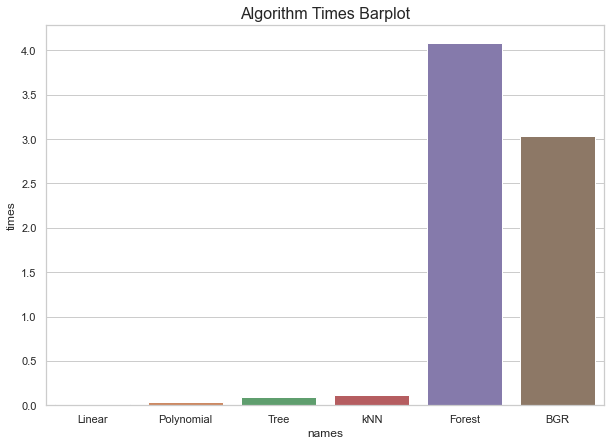

In [157]:
from matplotlib.pyplot import figure
figure(figsize=(10, 7))
sns.barplot(names, times).set_title("Algorithm Times Barplot",fontsize=16)
plt.xlabel("names")
plt.ylabel("times");

First of all we compare the times that each of the algorithms runs, We see that the forest need longer.

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


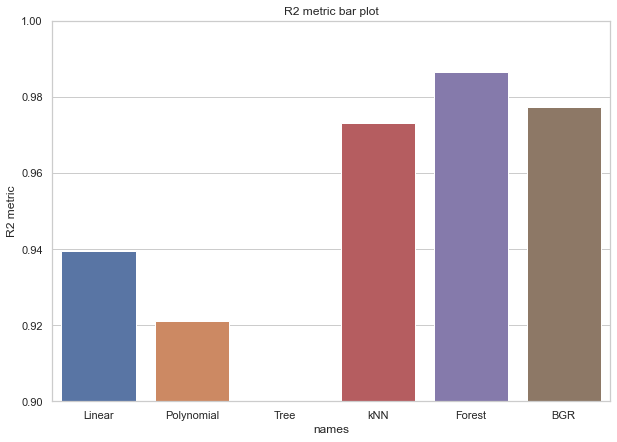

In [158]:
figure(figsize=(10, 7))
sns.barplot(names, r2).set(title='R2 metric bar plot', ylim=(0.9, 1.0))
plt.xlabel("names")
plt.ylabel("R2 metric");

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


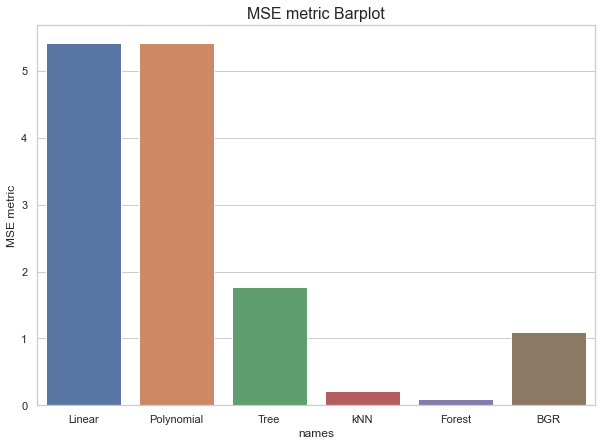

In [159]:
figure(figsize=(10, 7))
sns.barplot(names, MSE).set_title("MSE metric Barplot",fontsize=16)
plt.xlabel("names")
plt.ylabel("MSE metric");

In the performance we see that forests have the best possible performance. However, all algorithms generally perform well, there is no one to give us bad results.
